#                     Bank Reviews-Complaints Analysis

## Business Objectives
### Central banks collecting information about customer satisfaction with the services provided by different bank. Also collects the information about the complaints.

### The objective of the case study is to analyze customer reviews and predict customer satisfaction with the reviews

**Data processing**<br>
Key positive words/negative words (most frequent words)<br>
Classification of reviews into positive, negative and neutral<br>
Identify key themes of problems (using clustering, topic models)<br>
Predicting star ratings using reviews.<br>
Perform intent analysis<br>


 **Dataset**<br>
The data is a detailed dump of customer reviews/complaints (~500) of different services at different banks<br>

Date (Day the review was posted)<br>
Stars (1–5 rating for the business)<br>
text (Review text)
bank name

**Import necesssary libraries**

In [3]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import string
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer,TfidfVectorizer
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import nltk
from nltk.corpus import wordnet

**Import the data set**

In [4]:
data=pd.read_excel("BankReviews.xlsx")

In [5]:
data.head()

,Date,Stars,Reviews,BankName
0,2017-04-10,5,"Great job, Wyndham Capital! Each person was pr...",Wyndham Capital Mortgage
1,2017-02-10,5,Matthew Richardson is professional and helpful...,Wyndham Capital Mortgage
2,2017-08-21,5,We had a past experience with Wyndham Mortgage...,Wyndham Capital Mortgage
3,2017-12-17,5,We have been dealing with Brad Thomka from the...,Wyndham Capital Mortgage
4,2016-05-27,5,I can't express how grateful I am for the supp...,Wyndham Capital Mortgage


**Data Audit**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
Date        505 non-null datetime64[ns]
Stars       505 non-null int64
Reviews     505 non-null object
BankName    505 non-null object
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 15.9+ KB


In [7]:
data.shape

(505, 4)

In [8]:
data.isnull().sum()

Date        0
Stars       0
Reviews     0
BankName    0
dtype: int64

In [9]:
data['Stars'].value_counts()

5    410
1     95
Name: Stars, dtype: int64

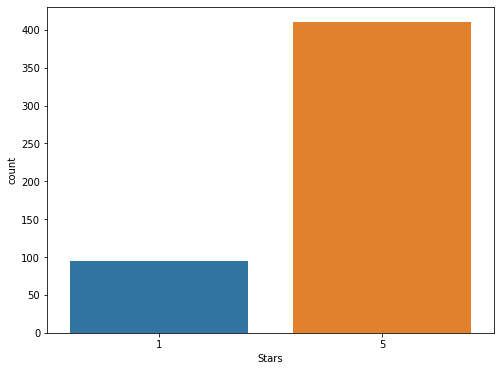

In [10]:
plt.figure(figsize=(8,6))
sns.countplot(data.Stars)
plt.show()

### Sentiment Analysis to find positive and negative reviews

In [11]:
x = data['Reviews']
y = data['Stars']

In [12]:
x.head()

0    Great job, Wyndham Capital! Each person was pr...
1    Matthew Richardson is professional and helpful...
2    We had a past experience with Wyndham Mortgage...
3    We have been dealing with Brad Thomka from the...
4    I can't express how grateful I am for the supp...
Name: Reviews, dtype: object

**Creating a use-rdefined function**

In [14]:
def sentiment_review(text):
    analysis = TextBlob(text)
    polarity_text = analysis.sentiment.polarity
    if polarity_text > 0:
        return 'Positive'
    elif polarity_text == 0:
        return 'Neutral'
    else:
        return 'Negative'  

**creating dictionary which will contain both the review and the sentiment of the review**

In [15]:
final_dictionary = []
for text in x:
    dictionary_sentiment = {}
    dictionary_sentiment['Review'] = text
    dictionary_sentiment['Sentiment'] = sentiment_review(text)
    final_dictionary.append(dictionary_sentiment)
print(final_dictionary[:5])

[{'Review': 'Great job, Wyndham Capital! Each person was professional and helped us move through our refinance process smoothly. Thank you!', 'Sentiment': 'Positive'}, {'Review': 'Matthew Richardson is professional and helpful. He helped us find the correct product for our mortgage. Thank you very much for the excellent service, Matthew!', 'Sentiment': 'Positive'}, {'Review': 'We had a past experience with Wyndham Mortgage and would without question use again and again if needed!! Wyndham went beyond the extra mile to not only right a wrong encountered from the servicer we were dealing on our previous loan, but they pulled together and found a viable option for us that ultimately saved us money. We would highly recommend Brad Thomka and the Wyndham Capital Mortgage team for your mortgage needs. Sincerest thanks Wyndham!! Ed & Lind', 'Sentiment': 'Negative'}, {'Review': 'We have been dealing with Brad Thomka from the beginning of what started out to be a very stressful time for us, but 

**Finding positive reviews**

In [17]:
positive_reviews = []
for review in final_dictionary:
    if review['Sentiment'] =='Positive':
        positive_reviews.append(review)
print(positive_reviews[:5])

[{'Review': 'Great job, Wyndham Capital! Each person was professional and helped us move through our refinance process smoothly. Thank you!', 'Sentiment': 'Positive'}, {'Review': 'Matthew Richardson is professional and helpful. He helped us find the correct product for our mortgage. Thank you very much for the excellent service, Matthew!', 'Sentiment': 'Positive'}, {'Review': 'We have been dealing with Brad Thomka from the beginning of what started out to be a very stressful time for us, but with the help from Brad and the entire Wyndham Mortgage team it was turned into a happy ending!! Brad and Wyndham went beyond the extra mile to not only right a wrong encountered from the servicer we were dealing on our previous loan, but they pulled\xa0together and found a viable option for us that ultimately saved us money. We are indebted and would highly recommend Brad Thomka and the Wyndham Capital Mortgage team for your mortgage needs. Sincerest thanks Wyndham!! Ed & LindRead Less', 'Sentimen

**Finding neutral reviews**

In [18]:
neutral_reviews = []
for review in final_dictionary:
    if review['Sentiment'] =='Neutral':
        neutral_reviews.append(review)
print(neutral_reviews[:5])

[{'Review': '\r\nPerson with whom I spoke kept interrupting me and telling me his "line" rather than listening to what info I wanted. Quite pushy, altho\' he said he wasn\'t a salesman. Closing costs were astronomical.\r\n        ', 'Sentiment': 'Neutral'}, {'Review': '\r\nThe rate re-lock-in rule was not followed.\r\n        ', 'Sentiment': 'Neutral'}, {'Review': "\r\nLending tree matching me up with companies that don't offer the product I requested.\r\n        ", 'Sentiment': 'Neutral'}, {'Review': '\r\nThey called me and asked about the city in NH that we where looking at and when I told him we might consider MA as well he hung up on me.\r\n        ', 'Sentiment': 'Neutral'}]


**Finding negative reviews**

In [19]:
negative_reviews = []
for review in final_dictionary:
    if review['Sentiment'] =='Negative':
        negative_reviews.append(review)
print(negative_reviews[:5])

[{'Review': 'We had a past experience with Wyndham Mortgage and would without question use again and again if needed!! Wyndham went beyond the extra mile to not only right a wrong encountered from the servicer we were dealing on our previous loan, but they pulled together and found a viable option for us that ultimately saved us money. We would highly recommend Brad Thomka and the Wyndham Capital Mortgage team for your mortgage needs. Sincerest thanks Wyndham!! Ed & Lind', 'Sentiment': 'Negative'}, {'Review': 'This was the worst experience ever. It was like they had never gone through the process before. I could not get a complete list of the documents required. Every other day it was a new request. The appraiser that they hired made so many mistakes I had to send in corrections and then during the underwriting process they had to go back and make more corrections. Wyndum would continue to ask for copies of documents over and over again. There were many documents that I had to send 3 a

**counting number of positive,neutral and negative reviews**

In [20]:
reviews_count = pd.DataFrame([len(positive_reviews),len(neutral_reviews),len(negative_reviews)],index=['Positive','Neutral','Negative'])

In [21]:
reviews_count

,0
Positive,466
Neutral,4
Negative,35


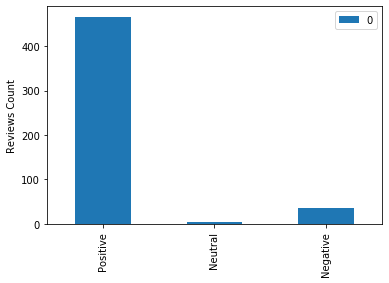

In [22]:
reviews_count.plot(kind='bar')
plt.ylabel('Reviews Count')   
plt.show()

**printing first five positive reviews**

In [23]:
i=1
for review in positive_reviews[:5]:
        print(i)
        print(review['Review'])
        print('******************************************************')
        i+=1

1
Great job, Wyndham Capital! Each person was professional and helped us move through our refinance process smoothly. Thank you!
******************************************************
2
Matthew Richardson is professional and helpful. He helped us find the correct product for our mortgage. Thank you very much for the excellent service, Matthew!
******************************************************
3
We have been dealing with Brad Thomka from the beginning of what started out to be a very stressful time for us, but with the help from Brad and the entire Wyndham Mortgage team it was turned into a happy ending!! Brad and Wyndham went beyond the extra mile to not only right a wrong encountered from the servicer we were dealing on our previous loan, but they pulled together and found a viable option for us that ultimately saved us money. We are indebted and would highly recommend Brad Thomka and the Wyndham Capital Mortgage team for your mortgage needs. Sincerest thanks Wyndham!! Ed & LindR

**printing first five negative reviews**

In [24]:
i=1
for review in negative_reviews[:5]:
        print(i)
        print(review['Review'])
        print('******************************************************')
        i+=1

1
We had a past experience with Wyndham Mortgage and would without question use again and again if needed!! Wyndham went beyond the extra mile to not only right a wrong encountered from the servicer we were dealing on our previous loan, but they pulled together and found a viable option for us that ultimately saved us money. We would highly recommend Brad Thomka and the Wyndham Capital Mortgage team for your mortgage needs. Sincerest thanks Wyndham!! Ed & Lind
******************************************************
2
This was the worst experience ever. It was like they had never gone through the process before. I could not get a complete list of the documents required. Every other day it was a new request. The appraiser that they hired made so many mistakes I had to send in corrections and then during the underwriting process they had to go back and make more corrections. Wyndum would continue to ask for copies of documents over and over again. There were many documents that I had to se

**Creating the corpus**

In [26]:
import re
corpus = []
for i in range(0, len(x)):
    review = re.sub(r'\W', ' ', str(x[i]))
    review = review.lower()
    review = re.sub(r'^br$', ' ', review)
    review = re.sub(r'\s+[a-z]\s+', ' ',review)
    review = re.sub(r'^[a-z]\s+', '', review)
    review = re.sub(r'\s+', ' ', review)
    corpus.append(review)

In [27]:
x[0]

'Great job, Wyndham Capital! Each person was professional and helped us move through our refinance process smoothly. Thank you!'

In [28]:
corpus[0]

'great job wyndham capital each person was professional and helped us move through our refinance process smoothly thank you '

In [29]:
from nltk.stem import WordNetLemmatizer
# sentences = nltk.sent_tokenize(paragraph)
lemmatizer = WordNetLemmatizer()

# Lemmatization
for i in range(len(corpus)):
    words = nltk.word_tokenize(corpus[i])
    words = [lemmatizer.lemmatize(word) for word in words]
    corpus[i] = ' '.join(words)

In [32]:
tokens_vect = CountVectorizer(stop_words='english')

In [36]:
token_dtm = tokens_vect.fit_transform(corpus)

In [44]:
tokens_vect.get_feature_names()[100:130]

['agent',
 'aggravating',
 'aggravation',
 'ago',
 'agree',
 'agreed',
 'agreement',
 'ahead',
 'airfare',
 'airline',
 'alerted',
 'alex',
 'alievatied',
 'alina',
 'allow',
 'allowed',
 'alpine',
 'altho',
 'alves',
 'amazing',
 'amd',
 'american',
 'amerisave',
 'amortgage',
 'andd',
 'anderson',
 'andrea',
 'andrew',
 'andy',
 'angelica']

In [45]:
token_dtm.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=int64)

In [46]:
token_dtm.toarray().shape

(505, 2249)

In [47]:
len(tokens_vect.get_feature_names())

2249

**creating a dataframe which shows the count of how many times a word is coming in the corpus**

In [48]:
count_dtm_dataframe = pd.DataFrame(np.sum(token_dtm.toarray(),axis=0),tokens_vect.get_feature_names()).reset_index()
count_dtm_dataframe.columns =['Word','Count']

In [49]:
count_dtm_dataframe.head()

,Word,Count
0,000,1
1,10,13
2,100,9
3,101,1
4,1031,2


In [50]:
#adding sentiment column which shows sentiment polarity of each word
sentiment_word = []
for word in count_dtm_dataframe['Word']:
    sentiment_word.append(sentiment_review(word))
count_dtm_dataframe['Sentiment'] = sentiment_word

In [51]:
count_dtm_dataframe.head()

,Word,Count,Sentiment
0,000,1,Neutral
1,10,13,Neutral
2,100,9,Neutral
3,101,1,Neutral
4,1031,2,Neutral


In [52]:
# separating positive words
positive_words_df= count_dtm_dataframe.loc[count_dtm_dataframe['Sentiment']=='Positive',:].sort_values('Count',ascending=False)

In [54]:
positive_words_df.head(5)

,Word,Count,Sentiment
918,great,139,Positive
255,best,100,Positive
1564,professional,71,Positive
984,highly,65,Positive
668,easy,65,Positive


**plotting word cloud of 10 most frequently used positive words**

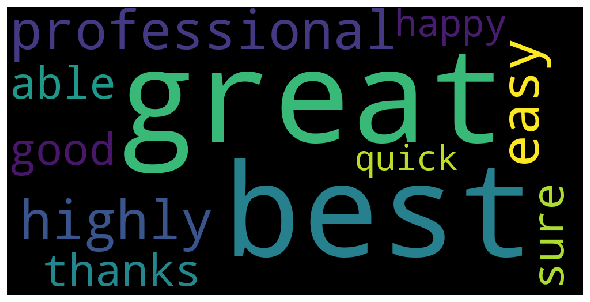

In [55]:
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(positive_words_df.iloc[0:11,0]))
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

**separating negative words**

In [56]:
negative_words_df= count_dtm_dataframe.loc[count_dtm_dataframe['Sentiment']=='Negative',:].sort_values('Count',ascending=False)

In [57]:
negative_words_df.head(5)

,Word,Count,Sentiment
395,closed,70,Negative
771,extremely,46,Negative
954,hard,42,Negative
1516,poor,32,Negative
438,complicated,18,Negative


**plotting word cloud of 10 most frequently used negative words**

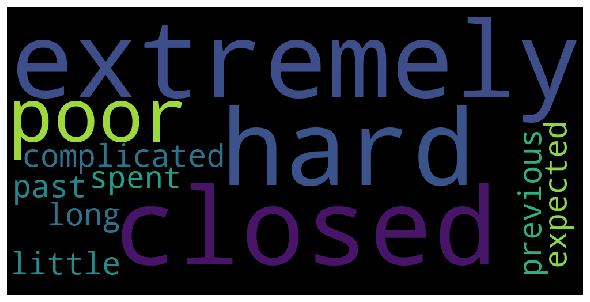

In [58]:
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(negative_words_df.iloc[0:11,0]))
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

## Topic Modelling

**Splitting the data into train and test**

In [59]:
train_x,test_x,train_y,test_y = train_test_split(x,y,random_state = 123, test_size = 0.2) 

In [60]:
print('No.of observations in train_x: ',len(train_x), '| No.of observations in test_x: ',len(test_x))
print('No.of observations in train_y: ',len(train_y), '| No.of observations in test_y: ',len(test_y))

No.of observations in train_x:  404 | No.of observations in test_x:  101
No.of observations in train_y:  404 | No.of observations in test_y:  101


### Feature generation using TDM

In [69]:
vect_tdm = TfidfVectorizer(strip_accents='unicode', stop_words='english', ngram_range=(1,1),min_df=0.001,max_df=0.95)

In [70]:
train_x_tdm = vect_tdm.fit_transform(train_x)
test_x_tdm = vect.transform(test_x)

In [71]:
print('No.of features for are',len(vect_tdm.get_feature_names()))

No.of features for are 2265


In [72]:
# creating dataframe to to see which features are present in the documents
train_x_tdm_df = pd.DataFrame(train_x_tdm.toarray(),columns=vect_tdm.get_feature_names())

In [74]:
train_x_tdm_df.head()

,10,100,101,1031,1040s,11,12,13,14,15,...,wyndum,xx,year,years,yelp,yep,yes,zach,zelada,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Train a LDA Model

In [75]:
lda_model = LatentDirichletAllocation(n_components=20, learning_method='online', max_iter=50)
x_topics = lda_model.fit_transform(train_x_tdm)
topic_word = lda_model.components_ 
vocab = vect.get_feature_names()

**view the topic models**

In [76]:
top_words = 10
topic_summaries = []
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(top_words+1):-1]
    topic_summaries.append(' '.join(topic_words))
    print(topic_words)

['money' 'wyndham' 'refer' 'company' 'loan' 'needs' 'informed' 'level'
 'service' 'assessment']
['just' 'rep' 'closing' 'disappeared' 'sensed' 'thankfully' 'failed'
 'plenty' 'firm' 'tons']
['anthony' 'receptive' 'thorough' 'marroquin' 'quick' 'efficient' 'close'
 'effective' 'fi' 'solution']
['bad' 'job' 'represents' 'gets' 'teddy' 'communicative' 'patient' 'hard'
 'company' 'working']
['listening' 'astronomical' 'interrupting' 'salesman' 'altho' 'info'
 'pushy' 'quite' 'telling' 'line']
['interested' 'attorney' 'increase' 'legal' 'looked' 'cos' 'employees'
 'amerisave' 'meant' 'clicking']
['hartegan' 'brought' 'congratulations' 'hand' 'sending' 'written'
 'aspects' 'effective' 'touch' 'skills']
['corrections' 'documents' 'surprises' 'send' 'responsive' 'informative'
 'process' 'filed' 'wyndum' 'continue']
['speed' 'goodlet' 'satisfied' 'competitive' 'preferred' 'officers'
 'methods' 'proffessionalism' 'speaking' 'won']
['bank' 'donna' 'irs' 'documentation' 'weeks' 'sent' 'later' 'tax

In [77]:
# view the topic models
top_words = 10
topic_summaries = []
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(top_words+1):-1]
    topic_summaries.append(' '.join(topic_words))
topic_summaries

['money wyndham refer company loan needs informed level service assessment',
 'just rep closing disappeared sensed thankfully failed plenty firm tons',
 'anthony receptive thorough marroquin quick efficient close effective fi solution',
 'bad job represents gets teddy communicative patient hard company working',
 'listening astronomical interrupting salesman altho info pushy quite telling line',
 'interested attorney increase legal looked cos employees amerisave meant clicking',
 'hartegan brought congratulations hand sending written aspects effective touch skills',
 'corrections documents surprises send responsive informative process filed wyndum continue',
 'speed goodlet satisfied competitive preferred officers methods proffessionalism speaking won',
 'bank donna irs documentation weeks sent later tax make times',
 'penny fit incredibly gladly rowel responsive encountered issues recommend services',
 'regular basis land undivided gave huge attention dean dream took',
 'jeremy local 

### Building Model on TDM

In [78]:
# building naive bayes model on TDM
naive_model = MultinomialNB()
naive_model.fit(train_x_tdm,train_y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [79]:
predict_train = naive_model.predict(train_x_tdm)
predict_test = naive_model.predict(test_x_tdm)

In [80]:
print('Accuracy on train: ',metrics.accuracy_score(train_y,predict_train))
print('Accuracy on test: ',metrics.accuracy_score(test_y,predict_test))

Accuracy on train:  0.9306930693069307
Accuracy on test:  0.9207920792079208


In [81]:
# predict probabilities on train and test
predict_prob_train = naive_model.predict_proba(train_x_tdm)[:,1]
predict_prob_test = naive_model.predict_proba(test_x_tdm)[:,1]

In [82]:
print('ROC_AUC score on train: ',metrics.roc_auc_score(train_y,predict_prob_train))
print('ROC_AUC score on test: ',metrics.roc_auc_score(test_y,predict_prob_test))

ROC_AUC score on train:  0.9950355454942611
ROC_AUC score on test:  0.9819277108433736


In [83]:
# confusion matrix on test 
cm_test = metrics.confusion_matrix(test_y,predict_test,[5,1])

In [84]:
cm_test

array([[82,  1],
       [ 7, 11]], dtype=int64)

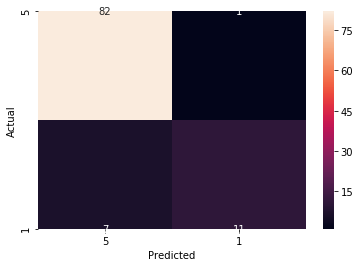

In [85]:
sns.heatmap(cm_test,annot=True,xticklabels=[5,1],yticklabels=[5,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Predicting star ratings using reviews**

### Creating the Tf-Idf model

In [87]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features = 2000, min_df = 0.05, max_df = 0.8, stop_words = stopwords.words('english'))
x = vectorizer.fit_transform(corpus).toarray()

In [88]:
x

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.33245169,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.12340384, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.1137738 , 0.08430181,
        0.1272345 ]])

In [89]:
x.shape

(505, 137)

### Apply Logistic regression

In [90]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y=train_test_split(x,
                                              y,
                                              test_size=.3,
                                              random_state=42)

In [91]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit( train_x, train_y )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Model Accuracy Evaluation**

In [92]:
#Evelution of train and test accuracy
from sklearn import metrics
test_accuracy=metrics.accuracy_score(test_y,logreg.predict(test_x))
print('test_accuracy: ',test_accuracy)

train_accuracy=metrics.accuracy_score(train_y,logreg.predict(train_x))
print('train_accuracy: ',train_accuracy)

test_accuracy:  0.881578947368421
train_accuracy:  0.9178470254957507


Text(0.5, 15.0, 'Predicted label')

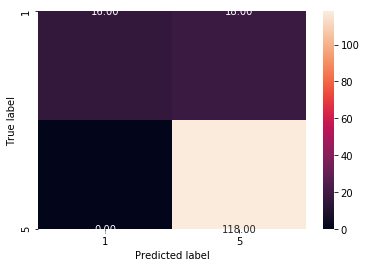

In [93]:
from sklearn import metrics

cm = metrics.confusion_matrix(test_y,
                            logreg.predict(test_x), [1,5] )
cm

import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["1", "5"] , yticklabels = ["1", "5"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [94]:
cm

array([[ 16,  18],
       [  0, 118]], dtype=int64)

***As we can see from confusion matrix our model is not over fitted***

### Final Prediction

In [96]:
# Dropping the irrelevant variables
data.drop(['Date','BankName'],axis=1,inplace=True)

In [97]:
data.head(3)

,Stars,Reviews
0,5,"Great job, Wyndham Capital! Each person was pr..."
1,5,Matthew Richardson is professional and helpful...
2,5,We had a past experience with Wyndham Mortgage...


In [98]:
#Concatenating final prediction with original data set(all obersvations):

pred_stars=pd.DataFrame(logreg.predict(x),columns=['predicted_stars'])
  
testfile = pd.concat([data, pred_stars], axis=1)

testfile.head(10)

,Stars,Reviews,predicted_stars
0,5,"Great job, Wyndham Capital! Each person was pr...",5
1,5,Matthew Richardson is professional and helpful...,5
2,5,We had a past experience with Wyndham Mortgage...,5
3,5,We have been dealing with Brad Thomka from the...,5
4,5,I can't express how grateful I am for the supp...,5
5,5,I had the pleasure of working with Wyndham Cap...,5
6,5,My experience with Mattison was beyond greatly...,5
7,5,Patrick answered all my questions by email imm...,5
8,5,I loved working with this group of people! The...,5
9,5,Great web interface for both the loan applicat...,5


### Final Submission in excel file

In [99]:
#Exporting testfile to csv for final submission

testfile.to_csv('Review_submission.csv',index=False)